In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import fkplotlib
from fisc import Data

### Fake TOI

<IPython.core.display.Javascript object>


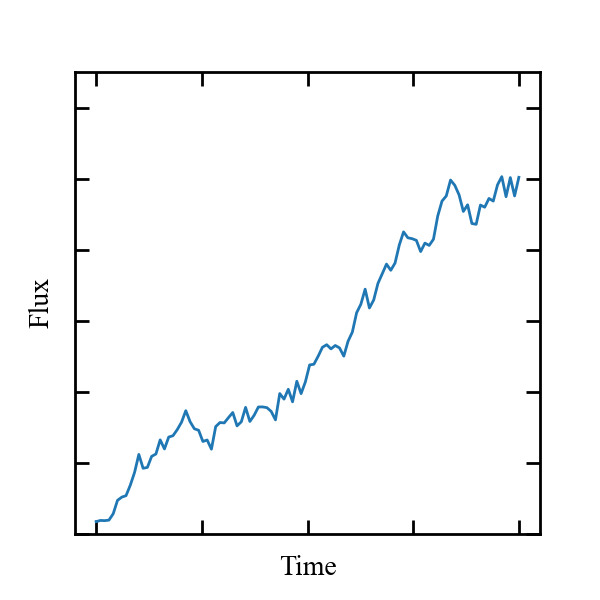

In [2]:
t = np.linspace(0, 10, 100)
toi = gaussian_filter1d(t + np.sin(t) + np.random.normal(0, 1.0, t.shape), 2.0) + np.random.normal(0, 0.2, t.shape)

plt.close('all')
fig, ax = plt.subplots(figsize=(3, 3))
ax.plot(t, toi)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylim(0, 13)
ax.set_xlabel("Time")
ax.set_ylabel("Flux")
fkplotlib.ax_bothticks(ax)
fig.savefig("fake_toi.pdf", transparent=True)

### Individual pressure profile

<IPython.core.display.Javascript object>


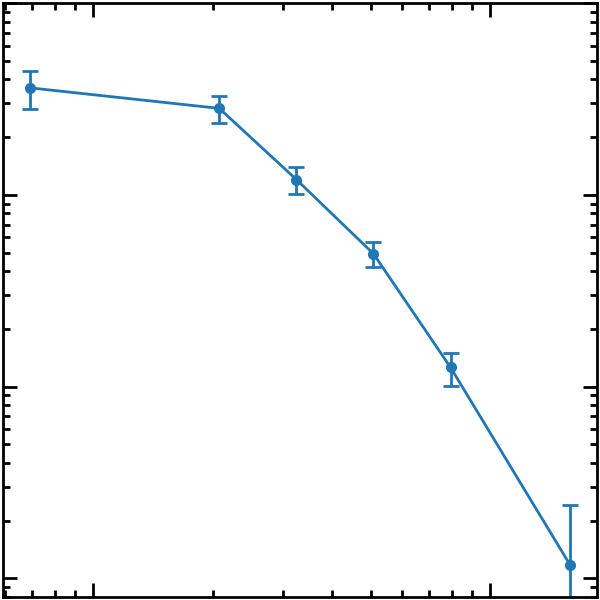

In [16]:
chains = np.load("These/Figures/Chap_panco/data/thermo_np.npz")

fig, ax = plt.subplots(figsize=(3, 3))
ax.errorbar(
    chains['r'], chains['p'], yerr=[chains['p'] - chains['errp'][1, :], chains['errp'][2, :] - chains['p']], 
    fmt="o-", capsize=3, ms=3
)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylim(8e-5, 1e-1)
ax.set_xlabel("Radius")
ax.set_ylabel("Pressure")
fkplotlib.ax_bothticks(ax)
fig.savefig("fake_pressure_1.pdf", transparent=True)

ax.set_xlabel(" ")
ax.set_ylabel(" ")
fig.subplots_adjust(left=0.005, right=0.995, bottom=0.005, top=0.995, wspace=0, hspace=0)
fig.savefig("fake_pressure_1_trim.pdf")

### Mean pressure profile

<IPython.core.display.Javascript object>


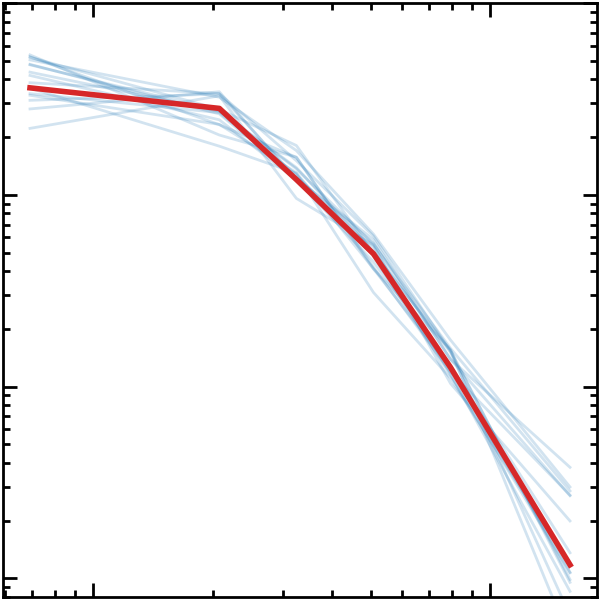

In [19]:
fig, ax = plt.subplots(figsize=(3, 3))
for i in np.random.randint(0, chains['allp'].shape[0], 15):
    ax.plot(chains['r'], chains['allp'][i], color="tab:blue", alpha=0.2)
ax.plot(chains['r'], chains['p'], color="tab:red", lw=2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylim(8e-5, 1e-1)
ax.set_xlabel("Radius")
ax.set_ylabel("Pressure")
fkplotlib.ax_bothticks(ax)
fig.savefig("fake_pressure_50.pdf", transparent=True)

ax.set_xlabel(" ")
ax.set_ylabel(" ")
fig.subplots_adjust(left=0.005, right=0.995, bottom=0.005, top=0.995, wspace=0, hspace=0)
fig.savefig("fake_pressure_50_trim.pdf")

### Individual mass profile

<IPython.core.display.Javascript object>


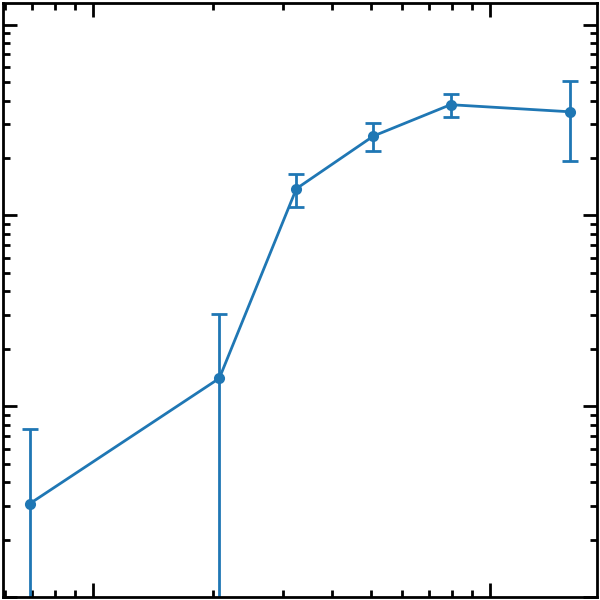

In [20]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.errorbar(
    chains['r'], chains['m'], yerr=[chains['m'] - chains['errm'][1, :], chains['errm'][2, :] - chains['m']], 
    fmt="o-", capsize=3, ms=3
)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylim(1e12, 1.3e15)
ax.set_xlabel("Radius")
ax.set_ylabel("Mass")
fkplotlib.ax_bothticks(ax)
fig.savefig("fake_mass_1.pdf", transparent=True)

ax.set_xlabel(" ")
ax.set_ylabel(" ")
fig.subplots_adjust(left=0.005, right=0.995, bottom=0.005, top=0.995, wspace=0, hspace=0)
fig.savefig("fake_mass_1_trim.pdf")

### Scaling relation

<IPython.core.display.Javascript object>


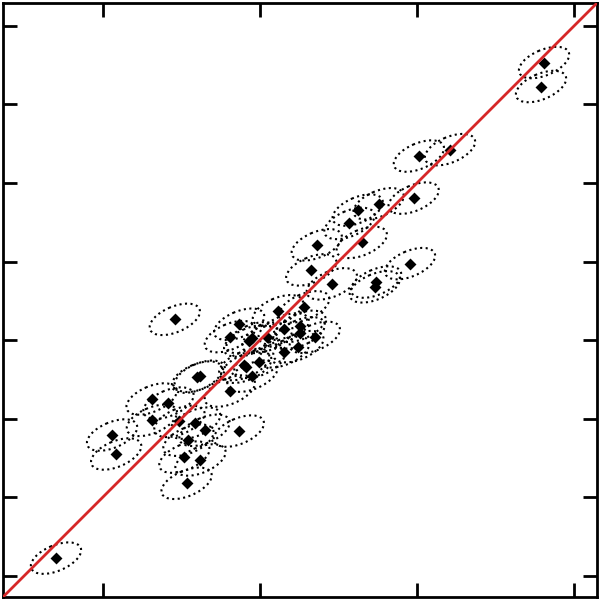

In [21]:
n = 50
truth = {"alpha.YIZ": 0.0, "beta.YIZ": 1.0, "sigma.YIZ.0": 0.1, "sigma.XIZ.0": 0.00}
nmix = 1

m = np.random.lognormal(0.0, 0.25, n)
x = np.random.normal(m, truth["sigma.XIZ.0"], n)
y = np.random.normal(
    truth["alpha.YIZ"] + truth["beta.YIZ"] * m, truth["sigma.YIZ.0"], n
)
x_err = 0.08 * np.ones(n)
y_err = 0.05 * np.ones(n)
corr = 0.5 * np.ones(n)
for ii in range(n):
    cov = np.array(
        [
            [x_err[ii] ** 2, corr[ii] * x_err[ii] * y_err[ii]],
            [corr[ii] * x_err[ii] * y_err[ii], y_err[ii] ** 2],
        ]
    )
    dx, dy = np.random.multivariate_normal([0, 0], cov)
    x[ii] += dx
    y[ii] += dy
                                                                             
threshold = None
msk = np.arange(n)
                                                                             
d = Data(
    x[msk],
    y[msk],
    x_err=x_err[msk],
    y_err=y_err[msk],
    corr=corr[msk],
    y_threshold=threshold,
)
fig, ax = d.plot_data(style="ellipse", color="k")
d.plot_alphabeta(ax, truth["alpha.YIZ"], truth["beta.YIZ"], color="tab:red", addeq=False, setlims=True, zorder=100)
fig.set_size_inches(3, 3)
fkplotlib.ax_bothticks(ax)
ax.set_xlabel("Mass")
ax.set_ylabel("Observable")
ax.set_xticklabels([])
ax.set_yticklabels([])
fig.savefig("scaling_ellipses_2.pdf", transparent=True)

ax.set_xlabel(" ")
ax.set_ylabel(" ")
fig.subplots_adjust(left=0.005, right=0.995, bottom=0.005, top=0.995, wspace=0, hspace=0)
fig.savefig("scaling_ellipses_2_trim.pdf", transparent=True)